# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nazhifa Noorviana Zahrawani
- **Email:** nazhifanzahrawani@gmail.com
- **ID Dicoding:** nazhifazah

## Menentukan Pertanyaan Bisnis

- Pada musim apa sepeda paling banyak disewa?
- Pada hari apa sepeda paling banyak disewa?
- Bagaimana pengaruh perbedaan cuaca terhadap jumlah sepeda yang disewa?
- Bagaimana perbandingan penyewaan sepeda berdasarkan jenis pengguna?
- Bagaimana tren penyewaan sepeda pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
Pada tahap ini, akan dikumpulkan semua data yang dibutuhkan. Dataset yang digunakan adalah kumpulan data yang berisi jumlah sepeda sewaan per hari (day) pada tahun 2011 sampai 2012 dengan informasi terkait cuaca dan musim.

Memuat tabel hari (day.csv)

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df
- Berikut penjelasan dari masing-masing kolom:
  - instant: index
  -  dteday: tanggal (mm/dd/yy)
  - season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
  - yr: tahun (0: 2011, 1: 2012)
  - mnth: bulan 1 sampai 12 (1: Januari, 2: Februari, dst)
  - holiday: hari libur atau tidak (0: jika hari itu tidak libur, 1: jika hari itu libur)
  - weekday: hari dalam seminggu (0: Minggu, 1: Senin, 2: Selasa, dst)
  - wokingday: hari kerja atau tidak (0: jika hari libur/akhir pekan, 1: jika hari kerja)
  - weathersit: cuaca (1: cerah, 2:kabut, 3: hujan ringan, 4:hujan lebat)
  - temp: suhu sebenarnya yang dinormalisasi (skala)
  - attemp: suhu dirasakan yang dinormasliasi (skala)
  - hum: kelembapan yang dinormaliasi (skala)
  - windspeed: kecepatan angin yang dinormalisasi (skala)
  - casual: jumlah pengguna biasa
  - registered: jumlah pengguna terdaftar
  - cnt: jumlah total sepeda sewaan termasuk pengguna biasa dan pengguna terdaftar

### Assessing Data
Tahap ini adalah proses menilai kualitas dari seluruh data yang akan digunakan.

- Menilai Data Pada Tabel day_df
<p> Pertama yang akan dilakukan adalah memeriksa tipe data data dari tiap kolom <p>

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil di atas, terlihat bahwa tabel terdiri dari 16 kolom dan 731 baris. Terlihat juga pada output di atas bahwa jumlah data pada day_df telah lengkap, tetapi pada tipe data dteday terdapat kesalahan. Data pada kolom dteday seharusnya bertipe data datetime, tetapi tertulis pada output bertipe object. Selanjutnya, akan dilakukan adalah memeriksa duplikasi data.

In [4]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Terlihat pada output bahwa tidak terdapat duplikasi data. Selanjutnya, akan ditampilkan ringkasan parameter statistik.

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Terlihat pada output bahwa tidak terdapat keanehan dalam data.

**Insight:**
- Terdapat 731 baris dan 16 kolom
- Terdapat kesalahan pada tipe data dteday, perlu diubah menjadi tipe data datetime. Untuk tipe data pada kolom lainnya telah sesuai
- Tidak ditemukan missing value
- Tidak terdapat duplikasi dalam data
- Tidak ditemukan inaccurate value
- Terdapat kesalahan pada tipe data dteday, perlu diubah menjadi tipe data datetime 

### Cleaning Data
<p>Pada tahap ini akan dilakukan pembersihan berbagai masalah yang telah diketahui dalam proses assessing data<p>

- Membersihkan Data day_df

In [6]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Terlihat pada output bahwa tipe data pada kolom dteday yang sebelumnya berupa object telah berubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [7]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Insight:
Berdasarkan rangkuman parameter statistik di atas, dapat diperoleh informasi sebagai berikut:
- Rata-rata jumlah total sepeda sewaan adalah sekitar 4504 sepeda per hari. Jumlah sepeda paling sedikit yang pernah disewa dalam satu hari adalah 22 sepeda, sedangkan jumlah sepeda paling banyak yang pernah disewa dalam satu hari adalah 8714 sepeda.
- Rata-rata jumlah pengguna biasa adalah sekitar 848 pengguna per hari.
- Rata-rata jumlah pengguna terdaftar adalah sekitar 3656 pengguna per hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa sepeda paling banyak disewa

In [8]:
season_group=day_df.groupby(by='season').agg({'cnt': 'sum'}).sort_values(by='cnt')
print(season_group)

            cnt
season         
1        471348
4        841613
2        918589
3       1061129


Berdasarkan pivot tabel pada day_df, dapat diketahui bahwa jumlah total sepeda paling banyak disewa adalah pada musim gugur (3). Selanjutnya, akan data tersebut akan divisualisasikan sebagai berikut:

C:\Users\Hello\AppData\Local\Temp\ipykernel_2356\1233316233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Hello\AppData\Local\Temp\ipykernel_2356\1233316233.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


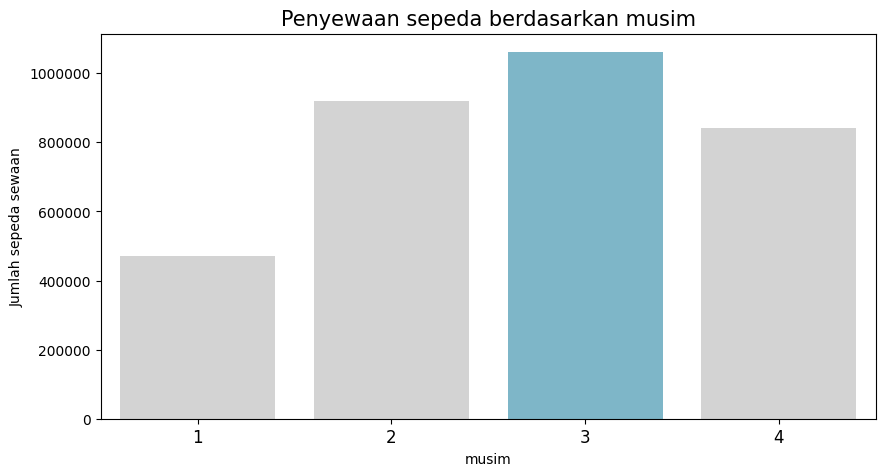

In [9]:
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="cnt", 
    x="season",
    data=season_group,
    palette=colors_
)
plt.title("Penyewaan sepeda berdasarkan musim", loc="center", fontsize=15)
plt.ylabel("Jumlah sepeda sewaan")
plt.xlabel("musim")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, terlihat bahwa sepeda paling banyak disewa pada musim gugur (3).

### Pertanyaan 2: Pada hari apa sepeda paling banyak disewa?

In [10]:
weekday_group=day_df.groupby(by='weekday').agg({'cnt': 'mean'}).sort_values(by='cnt')
print(weekday_group)

                 cnt
weekday             
0        4228.828571
1        4338.123810
2        4510.663462
3        4548.538462
6        4550.542857
4        4667.259615
5        4690.288462


Berdasarkan pivot tabel pada day_df, dapat diketahui bahwa rata-rata jumlah sepeda paling banyak disewa adalah pada hari Jumat.

C:\Users\Hello\AppData\Local\Temp\ipykernel_2356\2403494250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


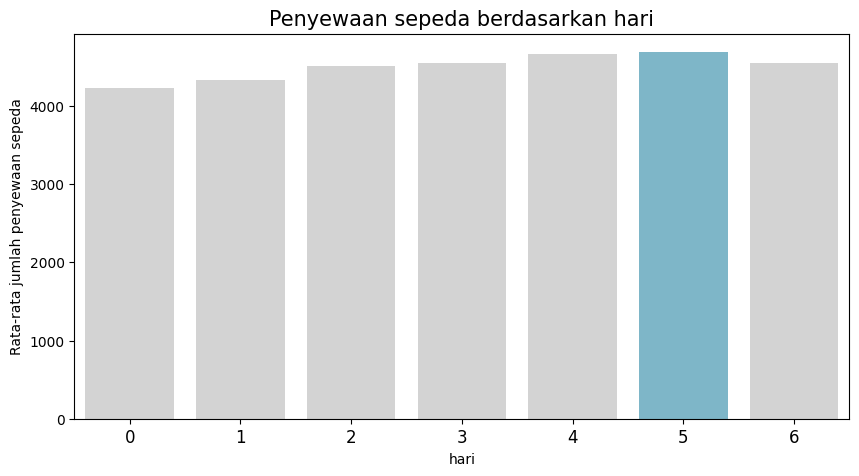

In [11]:
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
colors_ = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4", "#D3D3D3"]
sns.barplot(
    y="cnt", 
    x="weekday",
    data=weekday_group,
    palette=colors_
)
plt.title("Penyewaan sepeda berdasarkan hari", loc="center", fontsize=15)
plt.ylabel("Rata-rata jumlah penyewaan sepeda")
plt.xlabel("hari")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, terlihat bahwa rata-rata sepeda paling banyak disewa adakah pada hari jumat. Namun, perbedaan rata-rata jumlah sepeda yang disewa antar harinya tidak cukup besar. 

### Pertanyaan 3: Bagaimana pengaruh perbedaan cuaca terhadap jumlah sepeda sewaan?

In [12]:
weathersit_group=day_df.groupby(by='weathersit').agg({'cnt': 'mean'}).sort_values(by='cnt')
print(weathersit_group)

                    cnt
weathersit             
3           1803.285714
2           4035.862348
1           4876.786177


C:\Users\Hello\AppData\Local\Temp\ipykernel_2356\3136411638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


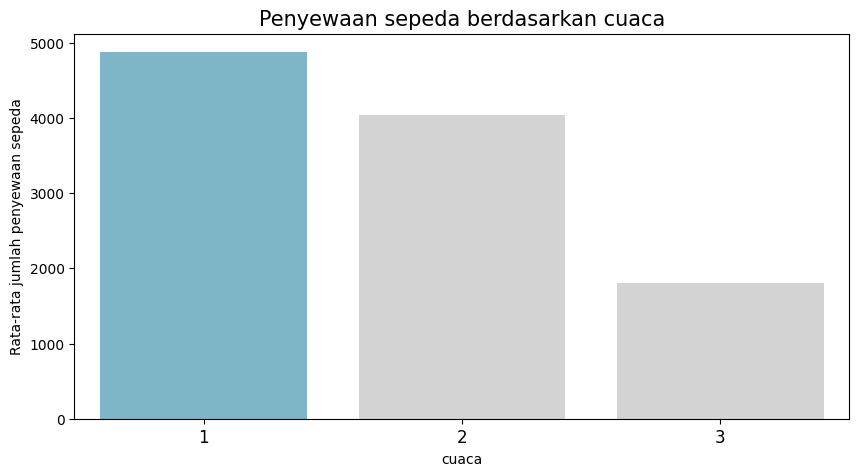

In [13]:
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')
colors_ = ["#72BCD4","#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="cnt", 
    x="weathersit",
    data=weathersit_group,
    palette=colors_
)
plt.title("Penyewaan sepeda berdasarkan cuaca", loc="center", fontsize=15)
plt.ylabel("Rata-rata jumlah penyewaan sepeda")
plt.xlabel("cuaca")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan pivot tabel pada day_df, didapatkan hasil sebagai berikut:
- rata-rata jumlah total sepeda sewaan saat hujan ringan adalah 1803 sepeda
- rata-rata jumlah total sepeda sewaan saat kabut adalah 4035 sepeda
- rata-rata jumlah total sepeda sewaan saat cerah adalah 4876 sepeda
- Dapat diketahui bahwa rata-rata jumlah total sepeda sewaan paling banyak adalah pada saat cuaca cerah (1). Terlihat pada tabel bahwa tidak ada sepeda yang disewa pada saat hujan lebat (4).

**Insight:**
- Sepeda paling banyak disewa pada musim gugur
- Rata-rata sepeda paling banyak disewa pada hari Jumat
- Terdapat pengaruh antara cuaca dengan jumlah total sepeda yang disewa. Semakin cuacanya baik, semakin banyak sepeda yang disewa.

## Analisis Lanjutan (Opsional)

### Pertanyaan 4: Bagaimana perbandingan jumlah sepeda yang disewa berdasarkan jenis pengguna?

In [14]:
date_group1=day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
})
print(date_group1)

    casual  registered
yr                    
0   247252      995851
1   372765     1676811


<function matplotlib.pyplot.show(close=None, block=None)>

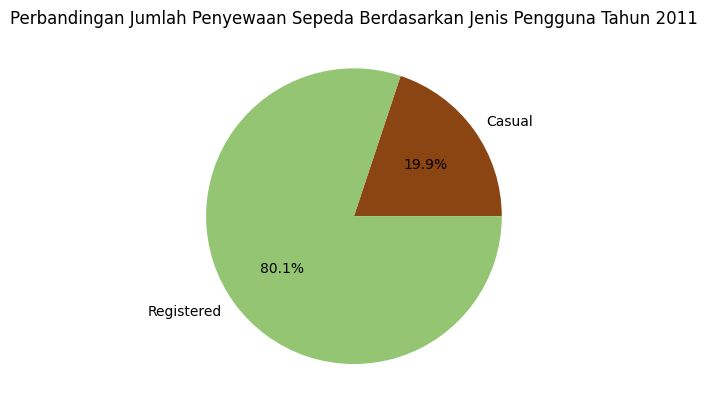

In [15]:
Total2011=(247252,995851)
colors = ('#8B4513', '#93C572')
plt.pie(
    x=Total2011,
    labels=["Casual","Registered"],
    autopct='%1.1f%%',
    colors=colors,
)
plt.title('Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Jenis Pengguna Tahun 2011')
plt.show

Terlihat pada grafik bahwa persentase jumlah pengguna terdaftar pada tahun 2011 adalah 80,1%, sedangkan persentase jumlah pengguna biasa pada tahun 2011 adalah 19,9%.

<function matplotlib.pyplot.show(close=None, block=None)>

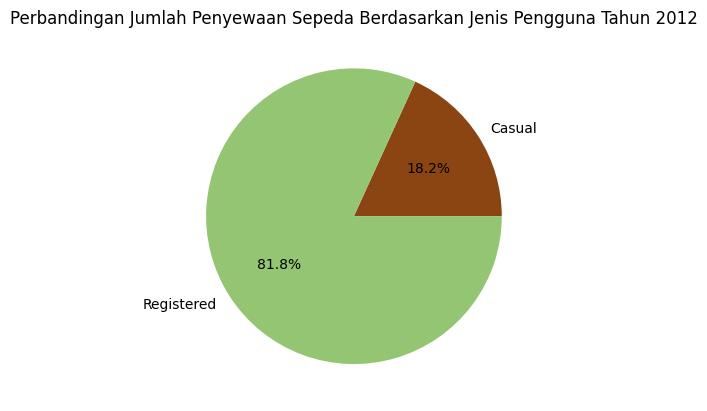

In [16]:
Total2012=(372765,1676811)
colors = ('#8B4513', '#93C572')
plt.pie(
    x=Total2012,
    labels=["Casual","Registered"],
    autopct='%1.1f%%',
    colors=colors,
)
plt.title('Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Jenis Pengguna Tahun 2012')
plt.show

Terlihat pada grafik bahwa persentase jumlah pengguna terdaftar pada tahun 2012 adalah 81,8%, sedangkan persentase jumlah pengguna biasa pada tahun 2012 adalah 18,2%. Berdasarkan kedua pie chart di atas, diketahui bahwa jumlah sepeda yang disewa oleh pengguna terdaftar lebih banyak daripada pengguna biasa untuk tahun 2011 dan 2012.

### Pertanyaan 5: Bagaimana tren penyewaan sepeda pada tahun 2011 dan 2012

In [17]:
day_df['year'] = day_df['dteday'].dt.year
date_group=day_df.groupby(['year', 'mnth']).agg({'cnt': 'sum'})
print(date_group)

              cnt
year mnth        
2011 1      38189
     2      48215
     3      64045
     4      94870
     5     135821
     6     143512
     7     141341
     8     136691
     9     127418
     10    123511
     11    102167
     12     87323
2012 1      96744
     2     103137
     3     164875
     4     174224
     5     195865
     6     202830
     7     203607
     8     214503
     9     218573
     10    198841
     11    152664
     12    123713


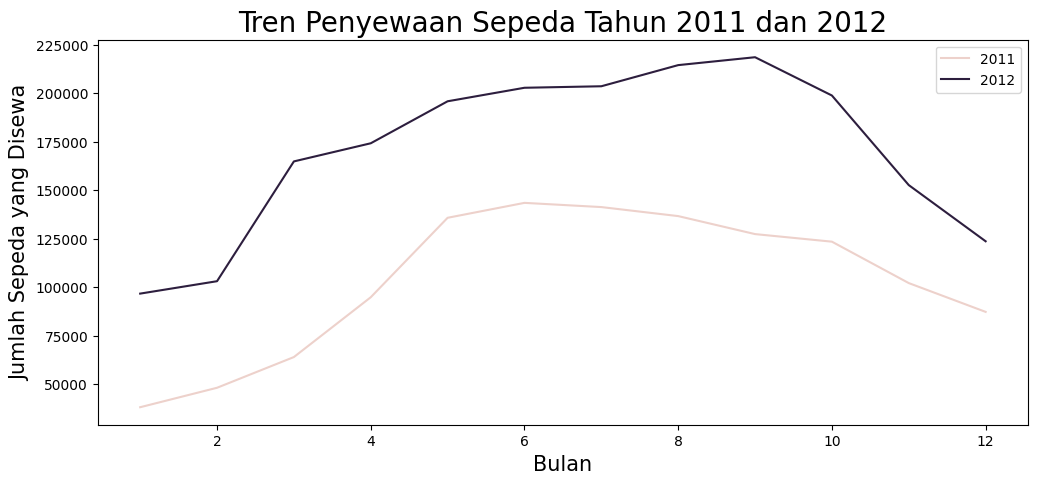

In [18]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=date_group, x='mnth', y="cnt", hue='year')
plt.title('Tren Penyewaan Sepeda Tahun 2011 dan 2012', size=20)
plt.xlabel('Bulan',size=15)
plt.ylabel('Jumlah Sepeda yang Disewa',size=15)
plt.legend()
plt.show()

Berdasarkan gambar di atas, diketahui bahwa jumlah sepeda yang disewa pada tahun 2012 lebih tinggi dibandingkan pada tahun 2011 setiap bulannya. Hal ini menandakan bahwa ada peningkatan jumlah sepeda yang disewa dari tahun sebelumnya.

**Insight:**
- Jumlah sepeda yang disewa oleh pengguna terdaftar lebih banyak daripada pengguna biasa untuk tahun 2011 dan 2012.
- Terdapat peningkatan jumlah sepeda yang disewa dari tahun 2011 ke tahun 2012.

## Conclusion

Berdasarkan analisis yang telah dilakukan didapatkan kesimpulan sebagai berikut:
- Tabel day_df terdiri dari 16 kolom dan 731 baris.
- Rata-rata jumlah total sepeda sewaan adalah sekitar 4504 sepeda per hari. Rata-rata jumlah pengguna biasa adalah sekitar 848 pengguna per hari. Rata-rata jumlah pengguna terdaftar adalah sekitar 3656 pengguna per hari.
- Jumlah total sepeda paling banyak disewa adalah pada musim gugur
- Rata-rata sepeda paling banyak disewa adalah pada hari Jumat, tetapi tidak terdapat perbedaan yang cukup besar antar harinya.
- Terdapat pengaruh antara cuaca dengan jumlah total sepeda yang disewa. Semakin cuacanya baik, semakin banyak sepeda yang disewa.
- Berdasarkan pie chart perbandingan pengguna diketahui bahwa jumlah sepeda yang disewa oleh pengguna terdaftar lebih banyak daripada pengguna biasa. Pada tahun 2011, persentase jumlah pengguna terdaftar adalah 80,1%, sedangkan persentase jumlah pengguna biasa adalah 19,9%. Pada tahun 2012, jumlah pengguna terdaftar adalah 81,8%, sedangkan persentase jumlah pengguna biasa adalah 18,2%. 
- Berdasarkan grafik tren penyewaan sepeda terlihat bahwa terdapat peningkatan jumlah sepeda yang disewa dari tahun 2011 ke tahun 2012.

In [19]:
#day_df.to_csv("main_data.csv", index=False)